In [1]:
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), "..", ".."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [2]:
import pandas as pd
from src.group_significance import siginificance_dataframe, plot_metrics_with_significance_side_by_side

In [3]:
older_adults_average_level = pd.read_csv("../../data/processed/older_adults/average_measurements.csv")
additional_info = pd.read_csv("../../data/raw/additional_participants_information.csv")

In [4]:
# Merge stability labels into the main dataframe
merged_df = older_adults_average_level.merge(
    additional_info[['participant name', 'low stability']],
    on='participant name',
    how='inner'
)

# Split into two DataFrames
low_stability = merged_df[merged_df['low stability'] == 1].copy()
non_low_stability = merged_df[merged_df['low stability'] == 0].copy()


In [5]:
low_stability['participant name'].nunique()

10

In [6]:
non_low_stability['participant name'].nunique()

28

In [7]:
styled_df = siginificance_dataframe(low_stability, non_low_stability, alpha=0.06)
styled_df

c:\fall_risk_analysis\src\group_significance.py:102: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled = df.style.applymap(highlight_significant, subset=['Force_Plate significant', 'ZED_COM significant'])


,State,Metric,P-value Force_Plate,P-value ZED_COM,Force_Plate significant,ZED_COM significant,Force_Plate test used,ZED_COM test used
0,closed,AP MAD,0.068703,0.086001,False,False,Welch,Mann-Whitney
1,closed,AP Max abs dev,0.073828,0.162028,False,False,Mann-Whitney,Mann-Whitney
2,closed,AP Range,0.097657,0.126075,False,False,Welch,Welch
3,closed,AP Variance,0.063101,0.079726,False,False,Mann-Whitney,Mann-Whitney
4,closed,Ellipse area,0.049451,0.031651,True,True,Mann-Whitney,Welch
5,closed,ML MAD,0.047438,0.012105,True,True,Welch,Welch
6,closed,ML Max abs dev,0.039603,0.009272,True,True,Welch,Mann-Whitney
7,closed,ML Range,0.016873,0.048469,True,True,Mann-Whitney,Welch
8,closed,ML Variance,0.022414,0.018770,True,True,Mann-Whitney,Welch
9,closed,Path length,0.074740,0.054221,False,True,t-test,Welch


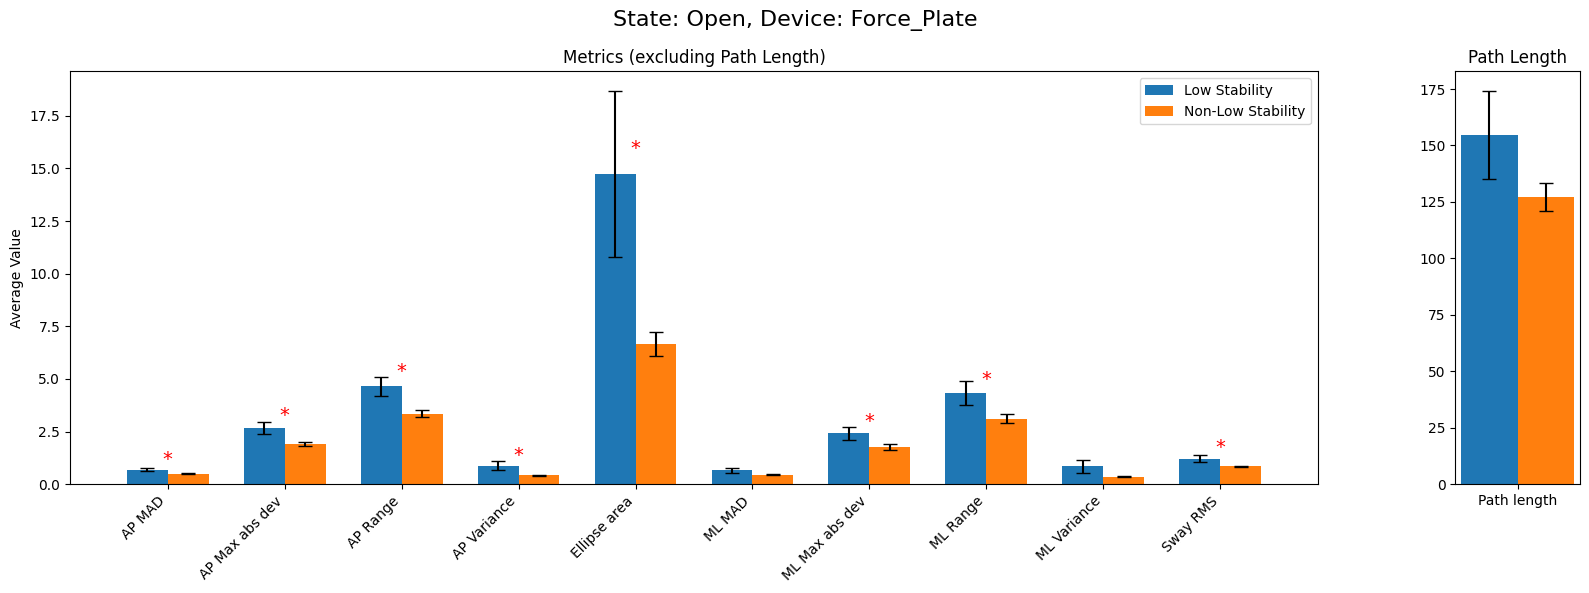

In [8]:
plot_metrics_with_significance_side_by_side(state='open', device='Force_Plate', df1=low_stability, df2=non_low_stability,
                                            group1_label='Low Stability', group2_label='Non-Low Stability', alpha=0.06)

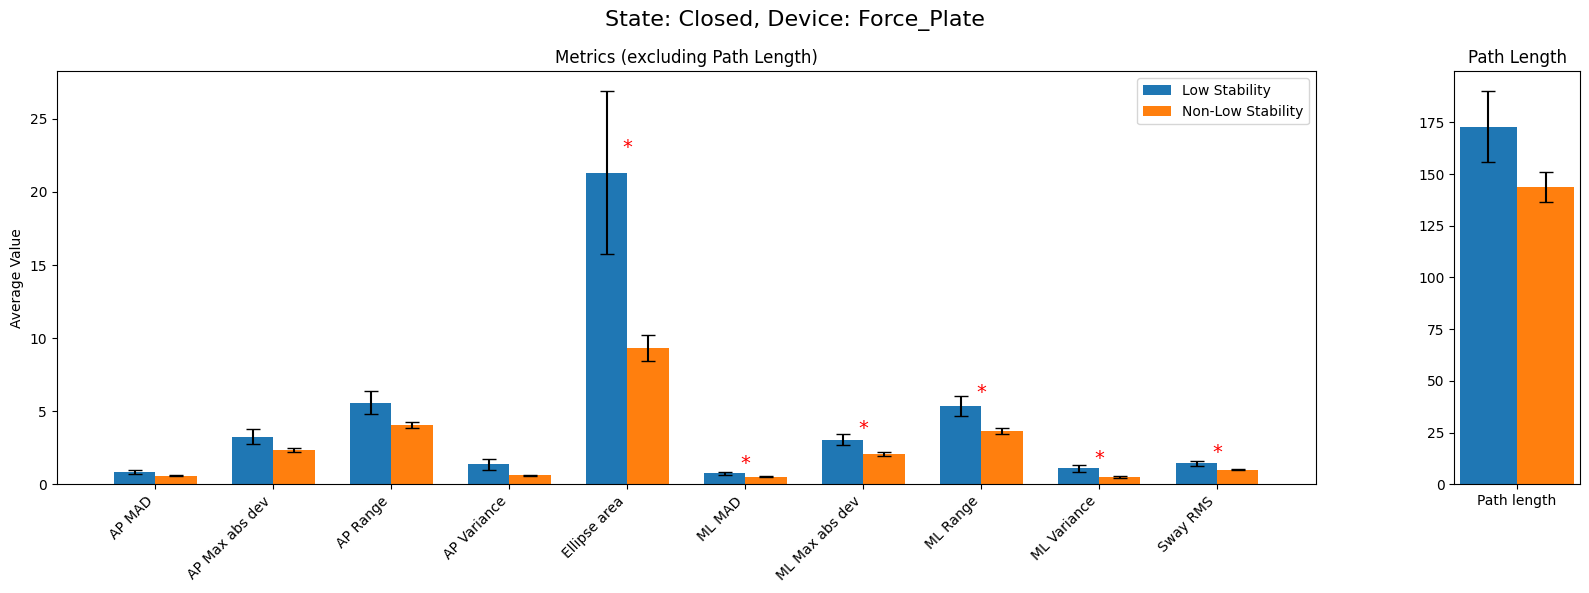

In [9]:
plot_metrics_with_significance_side_by_side(state='closed', device='Force_Plate', df1=low_stability, df2=non_low_stability, 
                                            group1_label='Low Stability', group2_label='Non-Low Stability', alpha=0.06)

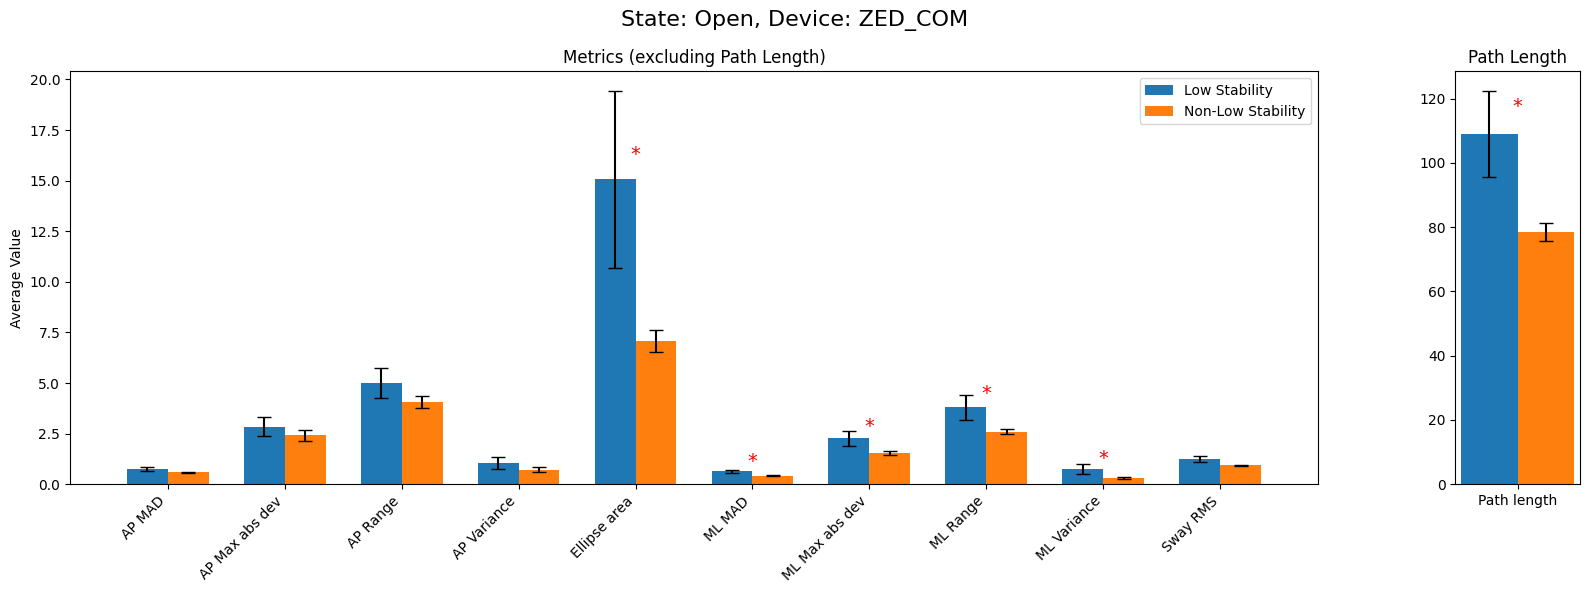

In [10]:
plot_metrics_with_significance_side_by_side(state='open', device='ZED_COM', df1=low_stability, df2=non_low_stability,
                                            group1_label='Low Stability', group2_label='Non-Low Stability', alpha=0.06)

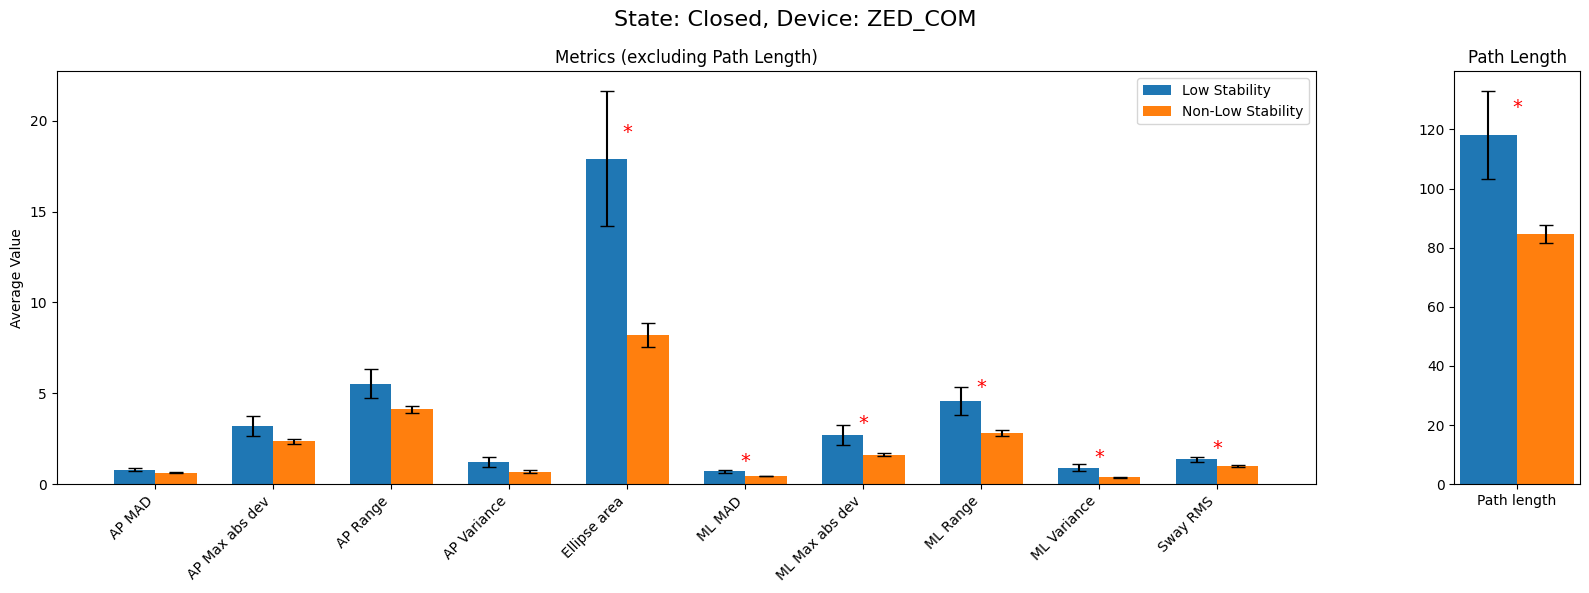

In [11]:
plot_metrics_with_significance_side_by_side(state='closed', device='ZED_COM', df1=low_stability, df2=non_low_stability,
                                            group1_label='Low Stability', group2_label='Non-Low Stability', alpha=0.06)